In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
Share={
    'Pop/Rock':0,
    'R&B;':1,
    'Country':2,
    'Jazz':3,
    'Electronic':4,
    'Vocal':5,
    'Reggae':6,
    'Latin':7,
    'Folk':8,
    'Blues':9,
    'Religious':10,
    'International':11,
    'New Age':12,
    'Comedy/Spoken':13,
    'Stage & Screen':14,
    'Classical':15,
    'Easy Listening':16,
    'Avant-Garde':17,
    'Unknown':18,
    "Children's":19
}
def get_label(x):
    x=str(x)
    return Share[x]
data=pd.read_csv("TempData/q2new_data.csv",encoding="utf-8")
data["label"]=data["type"].apply(get_label)
data=data.drop(columns=['type'])

In [2]:
#查看是否有空值 data.info(verbose=True,null_counts=True)
y=data[['label']]
X=data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
# train, test = train_test_split(data,test_size=0.2,random_state=7)
# feature_name = [x for x in train.columns if x not in ['label']]
# dtrain = xgb.DMatrix(train[feature_name],label=train['label'])
# dtest = xgb.DMatrix(test[feature_name],label=test['label'])

In [3]:
#自定义参数
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 20,               # 类别数，与 multisoftmax 并用
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.                # 如同学习率
    'seed': 921,
    'nthread': 4,
    'eval_metric':'merror'# cpu 线程数
}
vary_params={
    'eta': [0.007],
    'max_depth': [10],# 构建树的深度，越大越容易过拟合
    'gamma': [0.1],                 # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
}
model=xgb.XGBClassifier(params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=vary_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
grid_search = optimized_GBM.fit(X_train,y_train)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

F:\Anaconda3\lib\site-packages\xgboost\core.py:416: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   30.7s finished
F:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[02:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.069466 using {'eta': 0.007, 'gamma': 0.1, 'max_depth': 10}


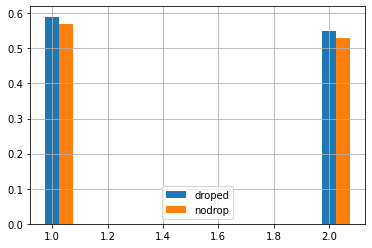

In [17]:
droped = [0.59, 0.55]
nodrop = [0.57,0.53]
labels =["data(origin)","data(droped)",'principal component(origin)','principal component(droped)']
import pandas as pd
import matplotlib.pyplot as plt
x=[1,2]
plt.figure()
plt.bar(x,droped,width=0.05,label='droped')
plt.bar([1.05,2.05],nodrop,width=0.05,label='nodrop')
plt.legend()
plt.grid(True)